# Pipeline Train

Next steps: 

## Imports

In [1]:
import functions as f
import neural_net
import dataset as d
import neural_net as nt
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import datasets, transforms
import torch.optim as optim

import numpy as np
import os
from sklearn.model_selection import train_test_split
from PIL import Image
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
matplotlib.style.use('ggplot')

## Setup Constants

In [2]:
# Setup the model function
# mode = 'ingredient_recognition'
mode = 'health_score'

# Setup Device
device = torch.device('mps')
print(device)

# Set Dataset Path
if mode == 'ingredients_recognition':
    csv_str ='/Users/mushr/Programming/AI_Projects/Digital_Health/food_dataset/ingredients_data.csv'
elif mode == 'health_score':
    csv_str = '/Users/mushr/Programming/AI_Projects/Digital_Health/health_score/health_score_dataset.csv'
    
# Training Constants
training_mode = True
model = nt.model(pretrained=True, requires_grad=False, mode=mode).to(device)
lr=0.001
epochs = 10
batch_size = 64
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.BCELoss()

mps
Finetuning the model, requires_grad set to False


## Training

In [ ]:
# Train Data
if training_mode:
    train_csv = pd.read_csv(csv_str)
    if mode == 'ingredient_recognition':
        train_data = d.ImageDataset(train_csv, train = True, test = False)
        valid_data = d.ImageDataset(train_csv, train = False, test = False)
    elif mode == 'health_score':
        train_data = d.Health_Dataset(train_csv, train = True, test = False)
        valid_data = d.Health_Dataset(train_csv, train = False, test = False)
    


# Training the Model
if training_mode:
    f.train(model,
              train_data=train_data,
              valid_data=valid_data,
              optimizer=optimizer,
              criterion=criterion,
              device=device,
              epochs=epochs,
              batch_size=batch_size,
              save_model=True,
              plot_losses=False,
              mode=mode)

Epoch 1/10
Training...


243it [05:04,  1.25s/it]                         


Validating...


  2%|▏         | 6/242 [00:07<05:04,  1.29s/it]

## Inference

Finetuning the model, requires_grad set to False
torch.Size([1, 3, 512, 512])
营养师: What you are eating is a total rubbish :(


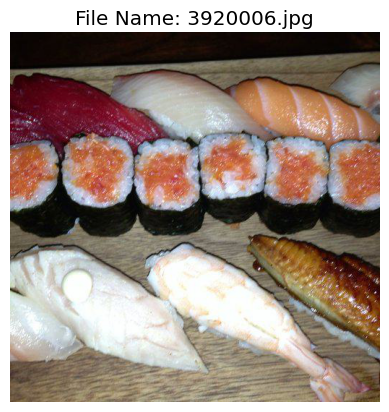

torch.Size([1, 3, 512, 382])
营养师: What you are eating is a total rubbish :(


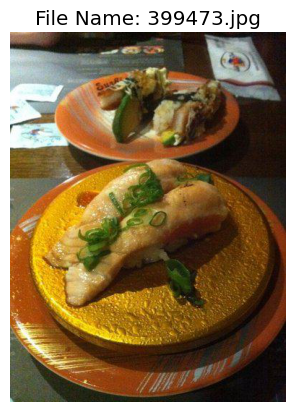

torch.Size([1, 3, 383, 512])
营养师: What you are eating is a total rubbish :(


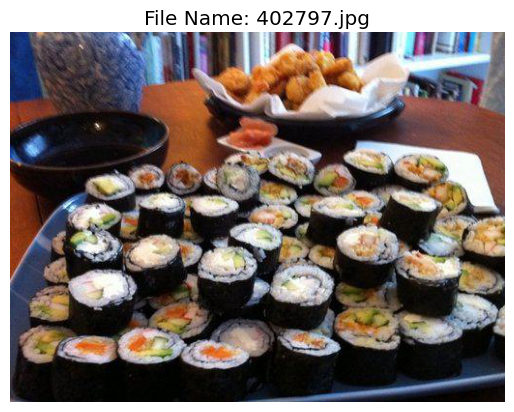

torch.Size([1, 3, 382, 512])
营养师: What you are eating is a total rubbish :(


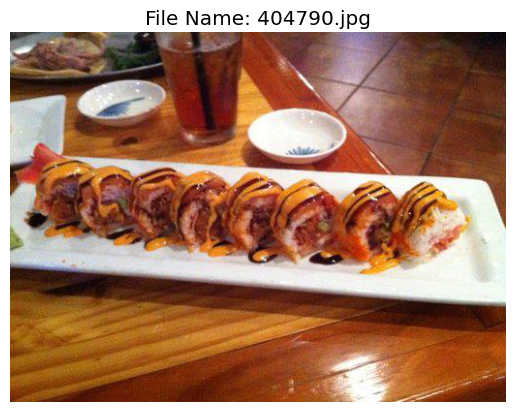

torch.Size([1, 3, 512, 382])
营养师: What you are eating is a total rubbish :(


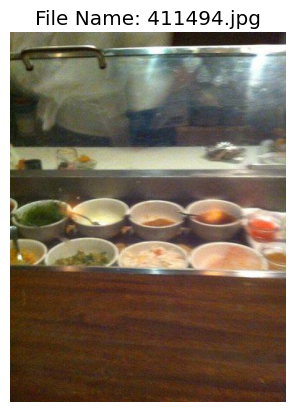

torch.Size([1, 3, 384, 512])
营养师: What you are eating is a total rubbish :(


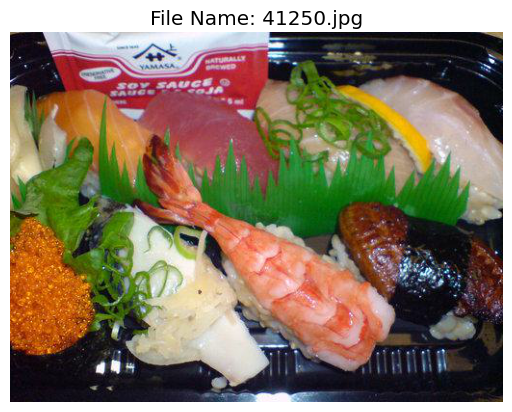

torch.Size([1, 3, 306, 512])
营养师: What you are eating is a total rubbish :(


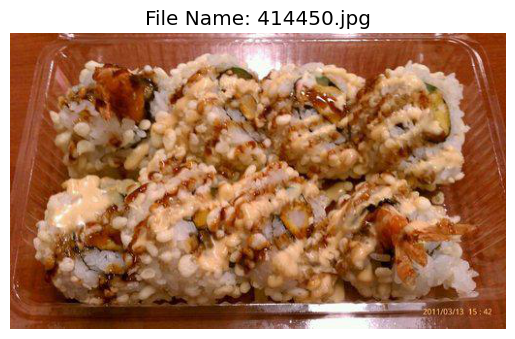

torch.Size([1, 3, 512, 512])
营养师: What you are eating is a total rubbish :(


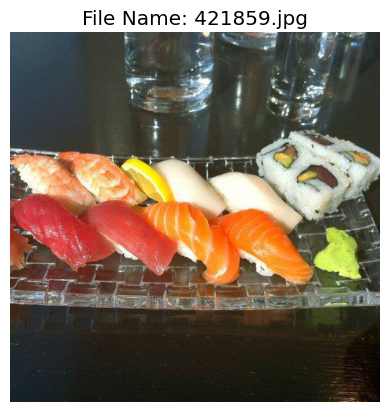

torch.Size([1, 3, 382, 512])
营养师: What you are eating is a total rubbish :(


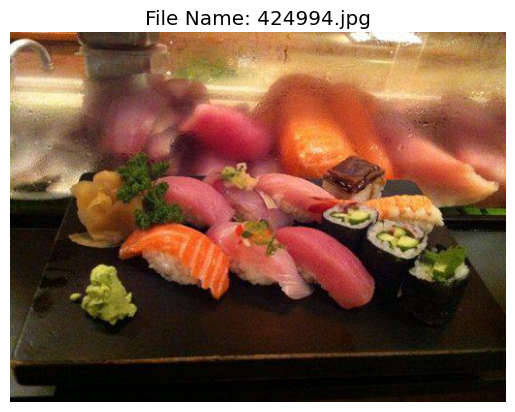

torch.Size([1, 3, 384, 512])
营养师: What you are eating is a total rubbish :(


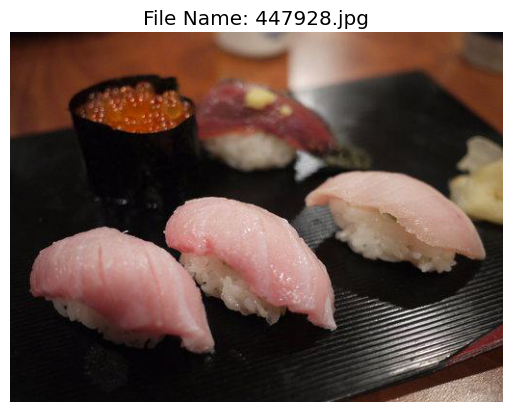

In [10]:
# Inference

model_path = '/Users/mushr/Programming/AI_Projects/Digital_Health/health_score/model.pth'

f.inference(model_path=model_path, device=device, csv=csv_str, mode=mode)

## A set of image paths to test:

/Users/mushr/Programming/AI_Projects/Digital_Health/food_dataset_hs/Crispy Chicken-Train (847).jpg

/Users/mushr/Programming/AI_Projects/Digital_Health/food_dataset_hs/Sandwich-Train (336).jpg

/Users/mushr/Programming/AI_Projects/Digital_Health/food_dataset_hs/Baked Potato-Train (578).jpg

/Users/mushr/Programming/AI_Projects/Digital_Health/WechatIMG800.jpg

Finetuning the model, requires_grad set to False


Enter an image path:  /Users/mushr/Programming/AI_Projects/Digital_Health/WechatIMG800.jpg


营养师: What you are eating is a total rubbish :(
The health score is: 0.3476383090019226


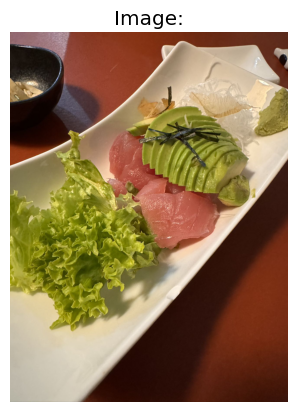

In [16]:
model_path = '/Users/mushr/Programming/AI_Projects/Digital_Health/health_score/model.pth'
f.user_interaction(model_path=model_path, device=device, mode=mode)